In [ ]:
# Instalar bibliotecas (executar uma vez no início)
!pip install numpy scipy soundfile matplotlib --quiet


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import firwin, lfilter


In [ ]:
# Carregar arquivo de áudio
audio, sr = sf.read('test2.wav')
audio_original, sr = sf.read('test2.wav')

# Se for estéreo, converte para mono
if len(audio.shape) > 1:
    audio = np.mean(audio, axis=1)

print(f"Áudio carregado: {len(audio)} amostras a {sr} Hz")

Áudio carregado: 228352 amostras a 44100 Hz


In [ ]:
# Definir os 4 filtros FIR com suas faixas
bands = [
    (500, 1500),
    (1200, 2000),
    (1800, 2500),
    (2500, 5000),

]
numtaps = 201
filters = [firwin(numtaps, [low, high], fs=sr, pass_zero=False) for (low, high) in bands]

In [ ]:
from scipy.signal import lfilter

# Duração de cada segmento (em segundos)
segment_duration = 0.080
segment_samples = int(segment_duration * sr)

# Número de segmentos
num_segments = len(audio) // segment_samples

# Inicializar sinal processado
processed_audio = np.zeros_like(audio)

# Alternar entre os filtros: 0 → filtro 1, 1 → filtro 2, 2 → filtro 3, 0 → ...
for i in range(num_segments):
    start = i * segment_samples
    end = start + segment_samples

    segment = audio[start:end]
    current_filter = filters[i % len(filters)]

    # Aplica o filtro ao segmento
    filtered_segment = lfilter(current_filter, [1.0], segment)

    # Insere no áudio final
    processed_audio[start:end] = filtered_segment

# Se houver sobra, processa o restante com o último filtro
if end < len(audio):
    segment = audio[end:]
    current_filter = filters[(i+1) % len(filters)]
    filtered_segment = lfilter(current_filter, [1.0], segment)
    processed_audio[end:] = filtered_segment


In [ ]:
# Aumentar o ganho
gain = 3.0
processed_audio *= gain

# 🧯 Evitar clipping
processed_audio = np.clip(processed_audio, -1.0, 1.0)


# 💾 Salvar
sf.write('wahwah_4filters.wav', processed_audio, sr)

audio_original, sr = sf.read('test2.wav')

# Se for estéreo, converte para mono
if len(audio_original.shape) > 1:
    audio_original = np.mean(audio_original, axis=1)



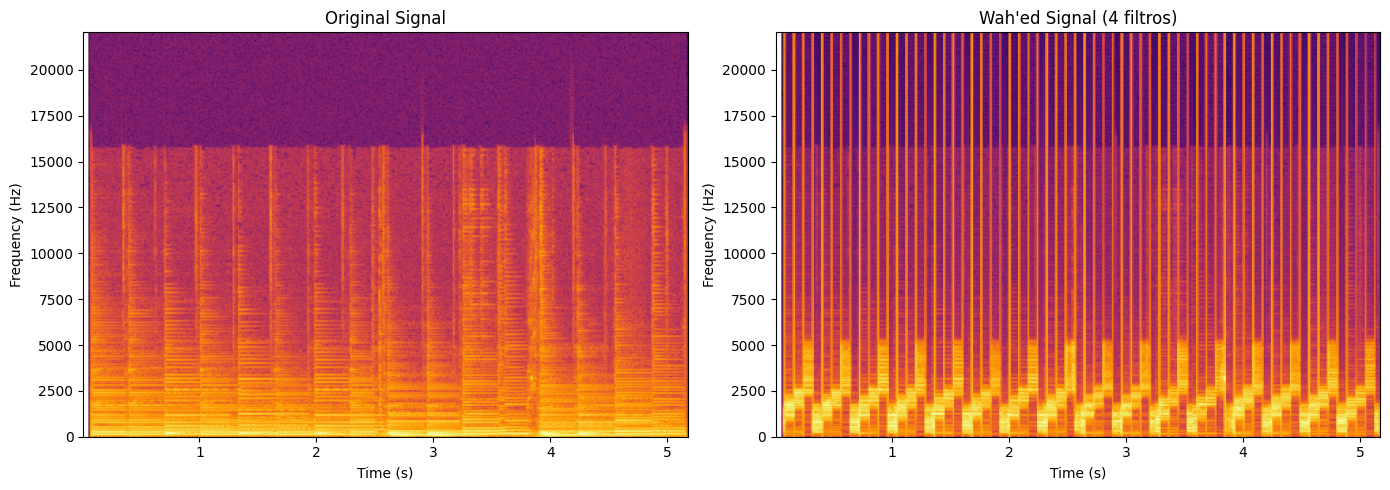

In [ ]:
# 📊 Gráfico: Espectrogramas
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.specgram(audio_original, Fs=sr, NFFT=1024, noverlap=512, cmap='inferno')
plt.title("Original Signal")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

plt.subplot(1, 2, 2)
plt.specgram(processed_audio, Fs=sr, NFFT=1024, noverlap=512, cmap='inferno')
plt.title("Wah'ed Signal (4 filtros)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

plt.tight_layout()
plt.show()